***Machine Learning Exp. 4 / 8th Sep 2022***


Regression Algorithm: Implement the non-parametric locally weighted regression algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

path = "/content/drive/MyDrive/regression_algo.csv"

In [ ]:
def kernel(point,xmat, k):
  m,n= np.shape(xmat)
  weights = np.mat(np.eye((m)))
  for j in range(m):
    diff = point - X[j]
    weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
  return weights

In [ ]:
def localWeight(point,xmat,ymat,k):
  wei = kernel(point,xmat,k)
  W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
  return W

In [ ]:
def localWeightRegression(xmat,ymat,k):
  m,n = np.shape(xmat)
  ypred = np.zeros(m)
  for i in range(m):
    ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
  return ypred

In [ ]:
data = pd.read_csv(path)
bill = np.array(data.total_bill)
tip = np.array(data.tip)

In [ ]:
mbill = np.mat(bill)
mtip = np.mat(tip)
m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X= np.hstack((one.T,mbill.T))

In [ ]:
ypred = localWeightRegression(X,mtip,2)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]

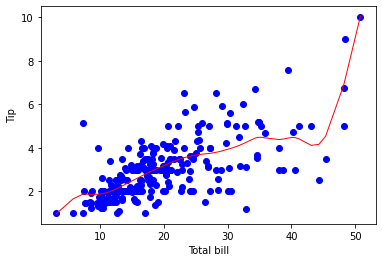

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='blue')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=1)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()